# Training
## Load libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import shap
from model import WNNBase, WNNVector, BasicNN
from training import train, evaluate, evaluate_predict, plot_curves
from interaction import neural_interaction_detection, neural_interaction_detection_basic, analyze_WNNBase, create_heatmap
from benchmark_functions import *
from sklearn.ensemble import RandomForestRegressor

## Create dataset

In [2]:
X_train, y_train = generate_data(50000, hnl4)
X_val, y_val = generate_data(10000, hnl4)
X_test, y_test = generate_data(10000, hnl4)

In [3]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(torch.from_numpy(X_train).to(torch.float32), torch.from_numpy(y_train).to(torch.float32))

val_dataset = TensorDataset(torch.from_numpy(X_val).to(torch.float32), torch.from_numpy(y_val).to(torch.float32))

test_dataset = TensorDataset(torch.from_numpy(X_test).to(torch.float32), torch.from_numpy(y_test).to(torch.float32))
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=512)

## Train models

### BasicNN

In [4]:
model_BasicNN = BasicNN(input_dimension=X_train.shape[1], output_dimension=1, neurons=64, n_layers=4,
                 activation=nn.functional.relu, output_activation=None)

In [5]:
model_BasicNN, best_loss, epochs, train_list_BasicNN, val_list_BasicNN = train(model_BasicNN, train_dataset, val_dataset,
                                                               epochs=1000, batch_size=128,
                                                               early_stopping_patience=50,
                                                               lr_start=0.01, lr_end=1e-10, betas=(0.9, 0.999),
                                                               scheduler_patience=10, scheduler_factor=0.5,
                                                               loss_fn=nn.MSELoss(), device='cpu', verbose=1, train_curve=True)

Epoch 1/1000 - training loss: 0.3249 - val loss: 0.0851 - 0m 0.377986s
Epoch 2/1000 - training loss: 0.0665 - val loss: 0.0481 - 0m 0.364492s
Epoch 3/1000 - training loss: 0.0405 - val loss: 0.0358 - 0m 0.364472s
Epoch 4/1000 - training loss: 0.0325 - val loss: 0.0336 - 0m 0.375552s
Epoch 5/1000 - training loss: 0.0282 - val loss: 0.0370 - 0m 0.377206s
Epoch 6/1000 - training loss: 0.0260 - val loss: 0.0290 - 0m 0.388667s
Epoch 7/1000 - training loss: 0.0228 - val loss: 0.0278 - 0m 0.374615s
Epoch 8/1000 - training loss: 0.0212 - val loss: 0.0340 - 0m 0.370920s
Epoch 9/1000 - training loss: 0.0214 - val loss: 0.0272 - 0m 0.378033s
Epoch 10/1000 - training loss: 0.0211 - val loss: 0.0220 - 0m 0.408869s
Epoch 11/1000 - training loss: 0.0205 - val loss: 0.0236 - 0m 0.389597s
Epoch 12/1000 - training loss: 0.0226 - val loss: 0.0333 - 0m 0.362249s
Epoch 13/1000 - training loss: 0.0171 - val loss: 0.0210 - 0m 0.372627s
Epoch 14/1000 - training loss: 0.0196 - val loss: 0.0243 - 0m 0.378573s
E

Epoch 115/1000 - training loss: 0.0072 - val loss: 0.0109 - 0m 0.360794s
Epoch 116/1000 - training loss: 0.0072 - val loss: 0.0109 - 0m 0.362619s
Epoch 117/1000 - training loss: 0.0072 - val loss: 0.0109 - 0m 0.362881s
Epoch 118/1000 - training loss: 0.0072 - val loss: 0.0110 - 0m 0.362807s
Epoch 119/1000 - training loss: 0.0072 - val loss: 0.0112 - 0m 0.361036s
Epoch 120/1000 - training loss: 0.0073 - val loss: 0.0110 - 0m 0.364221s
Epoch 121/1000 - training loss: 0.0072 - val loss: 0.0109 - 0m 0.364793s
Epoch 122/1000 - training loss: 0.0072 - val loss: 0.0109 - 0m 0.361890s
Epoch 123/1000 - training loss: 0.0072 - val loss: 0.0111 - 0m 0.358869s
Epoch 124/1000 - training loss: 0.0072 - val loss: 0.0115 - 0m 0.369917s
Epoch 125/1000 - training loss: 0.0072 - val loss: 0.0109 - 0m 0.359600s
Epoch 126/1000 - training loss: 0.0071 - val loss: 0.0110 - 0m 0.401075s
Epoch 127/1000 - training loss: 0.0071 - val loss: 0.0110 - 0m 0.433618s
Epoch 128/1000 - training loss: 0.0071 - val loss: 

Epoch 228/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.365440s
Epoch 229/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.359702s
Epoch 230/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.364175s
Epoch 231/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.390942s
Epoch 232/1000 - training loss: 0.0071 - val loss: 0.0108 - 0m 0.377362s
Epoch 233/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.365416s
Epoch 234/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.380549s
Epoch 235/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.379206s
Epoch 236/1000 - training loss: 0.0070 - val loss: 0.0107 - 0m 0.379040s
Epoch 237/1000 - training loss: 0.0070 - val loss: 0.0113 - 0m 0.368289s
Epoch 238/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.360426s
Epoch 239/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.364130s
Epoch 240/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.360813s
Epoch 241/1000 - training loss: 0.0070 - val loss: 

Epoch 341/1000 - training loss: 0.0070 - val loss: 0.0113 - 0m 0.361093s
Epoch 342/1000 - training loss: 0.0070 - val loss: 0.0107 - 0m 0.364309s
Epoch 343/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.363406s
Epoch 344/1000 - training loss: 0.0070 - val loss: 0.0107 - 0m 0.361717s
Epoch 345/1000 - training loss: 0.0070 - val loss: 0.0107 - 0m 0.364530s
Epoch 346/1000 - training loss: 0.0070 - val loss: 0.0107 - 0m 0.366335s
Epoch 347/1000 - training loss: 0.0070 - val loss: 0.0107 - 0m 0.363662s
Epoch 348/1000 - training loss: 0.0070 - val loss: 0.0107 - 0m 0.361536s
Epoch 349/1000 - training loss: 0.0070 - val loss: 0.0108 - 0m 0.360848s


In [6]:
test_loss, y_pred, y_current = evaluate_predict(model_BasicNN, test_loader, loss_fn=nn.MSELoss(), device='cpu', return_pred=True)
test_loss

0.1348530602408573

In [7]:
np.corrcoef(y_pred, y_current)[0][1]

0.9987218730011628

### WNNBase

In [8]:
model_WNNBase = WNNBase(input_dimension=X_train.shape[1], output_dimension=1, state_neurons=64, out_neurons=1, n_layers=4,
                state_activation=nn.functional.relu, out_activation=None, output_activation=None)

In [9]:
model_WNNBase, best_loss, epochs, train_list_WNNBase, val_list_WNNBase = train(model_WNNBase, train_dataset, val_dataset,
                                                               epochs=1000, batch_size=128,
                                                               early_stopping_patience=50,
                                                               lr_start=0.01, lr_end=1e-10, betas=(0.9, 0.999),
                                                               scheduler_patience=10, scheduler_factor=0.5,
                                                               loss_fn=nn.MSELoss(), device='cpu', verbose=1, train_curve=True)

Epoch 1/1000 - training loss: 0.4351 - val loss: 0.0929 - 0m 0.496574s
Epoch 2/1000 - training loss: 0.0644 - val loss: 0.0582 - 0m 0.480556s
Epoch 3/1000 - training loss: 0.0431 - val loss: 0.0414 - 0m 0.481170s
Epoch 4/1000 - training loss: 0.0255 - val loss: 0.0217 - 0m 0.484759s
Epoch 5/1000 - training loss: 0.0165 - val loss: 0.0152 - 0m 0.487802s
Epoch 6/1000 - training loss: 0.0166 - val loss: 0.0294 - 0m 0.485542s
Epoch 7/1000 - training loss: 0.0132 - val loss: 0.0124 - 0m 0.486654s
Epoch 8/1000 - training loss: 0.0124 - val loss: 0.0160 - 0m 0.495256s
Epoch 9/1000 - training loss: 0.0112 - val loss: 0.0113 - 0m 0.486925s
Epoch 10/1000 - training loss: 0.0111 - val loss: 0.0117 - 0m 0.485229s
Epoch 11/1000 - training loss: 0.0107 - val loss: 0.0101 - 0m 0.486866s
Epoch 12/1000 - training loss: 0.0103 - val loss: 0.0130 - 0m 0.484792s
Epoch 13/1000 - training loss: 0.0106 - val loss: 0.0075 - 0m 0.484754s
Epoch 14/1000 - training loss: 0.0092 - val loss: 0.0113 - 0m 0.485488s
E

Epoch 115/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.485378s
Epoch 116/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.485904s
Epoch 117/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.482252s
Epoch 118/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.483326s
Epoch 119/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.483797s
Epoch 120/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.485449s
Epoch 121/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.482194s
Epoch 122/1000 - training loss: 0.0005 - val loss: 0.0005 - 0m 0.485579s
Epoch 123/1000 - training loss: 0.0005 - val loss: 0.0006 - 0m 0.489790s
Epoch 124/1000 - training loss: 0.0004 - val loss: 0.0005 - 0m 0.489158s
Epoch 125/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.486286s
Epoch 126/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.487370s
Epoch 127/1000 - training loss: 0.0004 - val loss: 0.0006 - 0m 0.487259s
Epoch 128/1000 - training loss: 0.0004 - val loss: 

Epoch 228/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.500313s
Epoch 229/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.503235s
Epoch 230/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.499478s
Epoch 231/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.502883s
Epoch 232/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.500084s
Epoch 233/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.498505s
Epoch 234/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.500636s
Epoch 235/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.498216s
Epoch 236/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.498764s
Epoch 237/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.501448s
Epoch 238/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.499508s
Epoch 239/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.497952s
Epoch 240/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.499174s
Epoch 241/1000 - training loss: 0.0003 - val loss: 

Epoch 341/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.567628s
Epoch 342/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.543983s
Epoch 343/1000 - training loss: 0.0003 - val loss: 0.0005 - 0m 0.567865s


In [10]:
test_loss, y_pred, y_current = evaluate_predict(model_WNNBase, test_loader, loss_fn=nn.MSELoss(), device='cpu', return_pred=True)
test_loss

0.009652155742514879

In [11]:
np.corrcoef(y_pred, y_current)[0][1]

0.9999063374995983

### Random forest comparisson (as a sanity check)

In [12]:
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [13]:
y_pred = model.predict(X_test)
np.mean((y_pred-y_test)**2)

0.18084657284655617

In [14]:
np.corrcoef(y_pred, y_test)[0][1]

0.9663376573058928

### Visualization

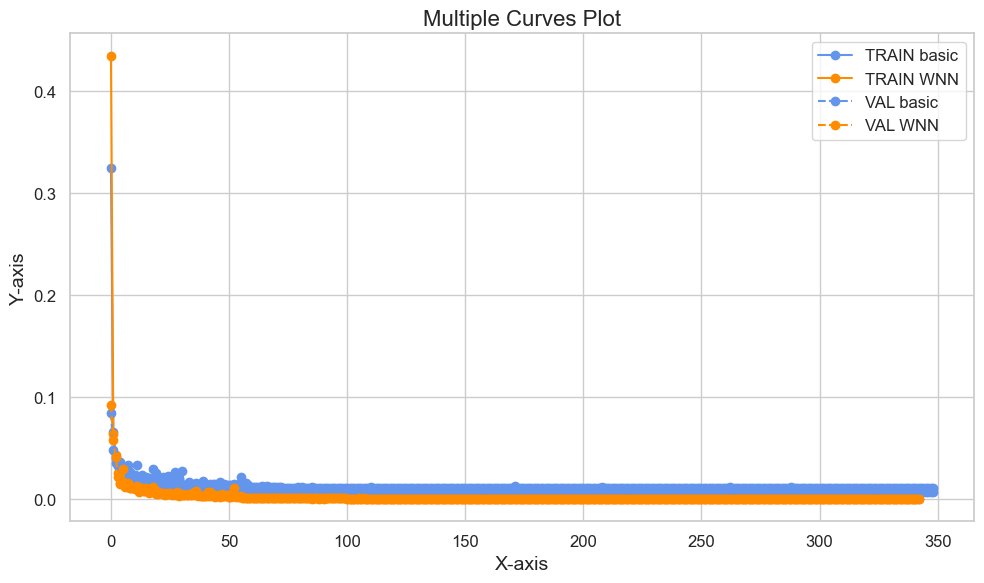

In [15]:
plot_curves(x_values=[np.arange(len(train_list_BasicNN)), np.arange(len(train_list_WNNBase)),
                      np.arange(len(val_list_BasicNN)), np.arange(len(val_list_WNNBase))], 
            y_values=[train_list_BasicNN, train_list_WNNBase,
                      val_list_BasicNN, val_list_WNNBase],
            colors=['cornflowerblue', 'darkorange', 'cornflowerblue', 'darkorange'],
            styles=["solid", "solid", "dashed", "dashed"],
            labels=["TRAIN basic", "TRAIN WNN", "VAL basic", "VAL WNN"])

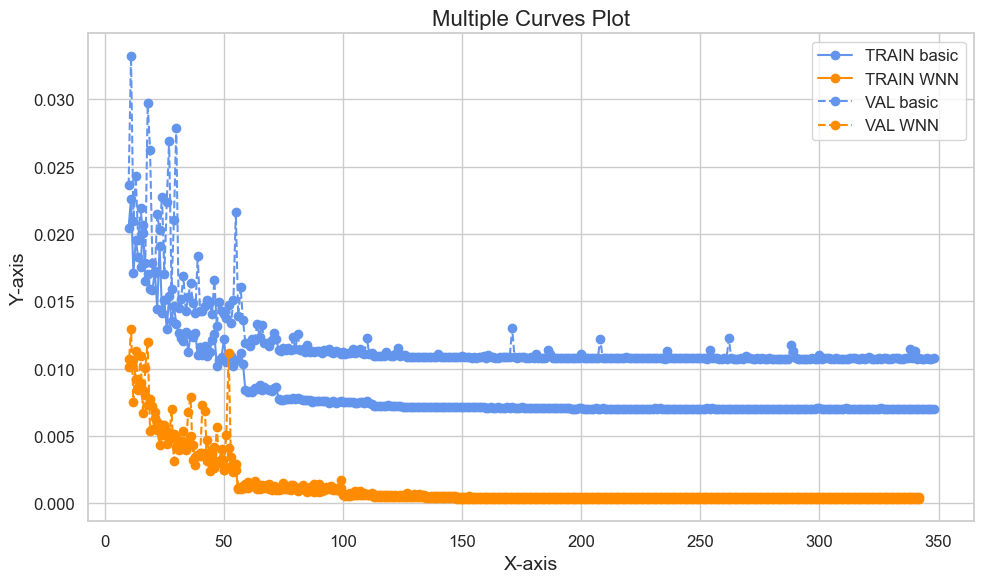

In [16]:
plot_curves(x_values=[np.arange(10,len(train_list_BasicNN)), np.arange(10,len(train_list_WNNBase)),
                      np.arange(10,len(val_list_BasicNN)), np.arange(10,len(val_list_WNNBase))], 
            y_values=[train_list_BasicNN[10:], train_list_WNNBase[10:],
                      val_list_BasicNN[10:], val_list_WNNBase[10:]],
            colors=['cornflowerblue', 'darkorange', 'cornflowerblue', 'darkorange'],
            styles=["solid", "solid", "dashed", "dashed"],
            labels=["TRAIN basic", "TRAIN WNN", "VAL basic", "VAL WNN"])

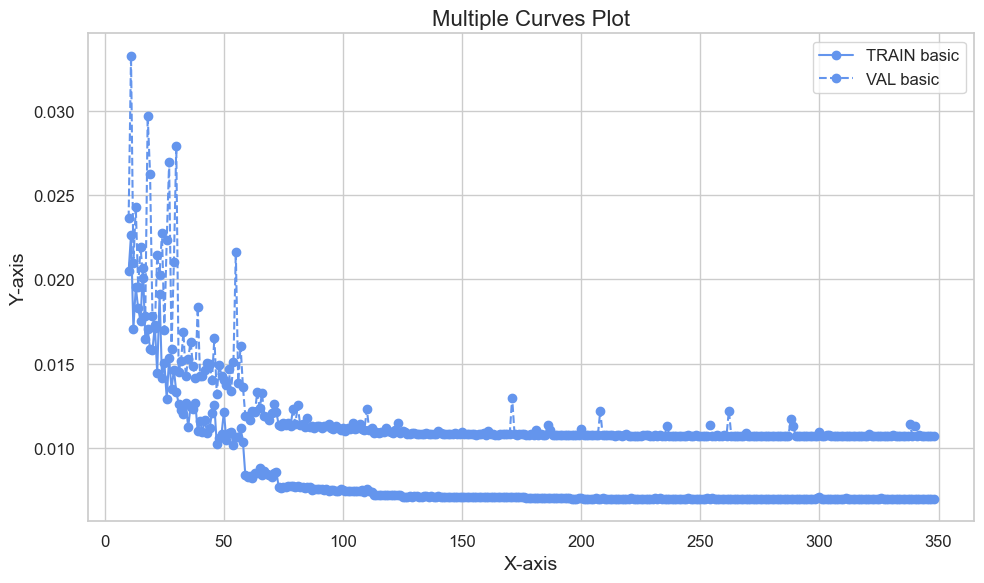

In [17]:
plot_curves(x_values=[np.arange(10,len(train_list_BasicNN)), np.arange(10,len(val_list_BasicNN))], 
            y_values=[train_list_BasicNN[10:], val_list_BasicNN[10:]],
            colors=['cornflowerblue', 'cornflowerblue'],
            styles=["solid", "dashed"],
            labels=["TRAIN basic", "VAL basic"])

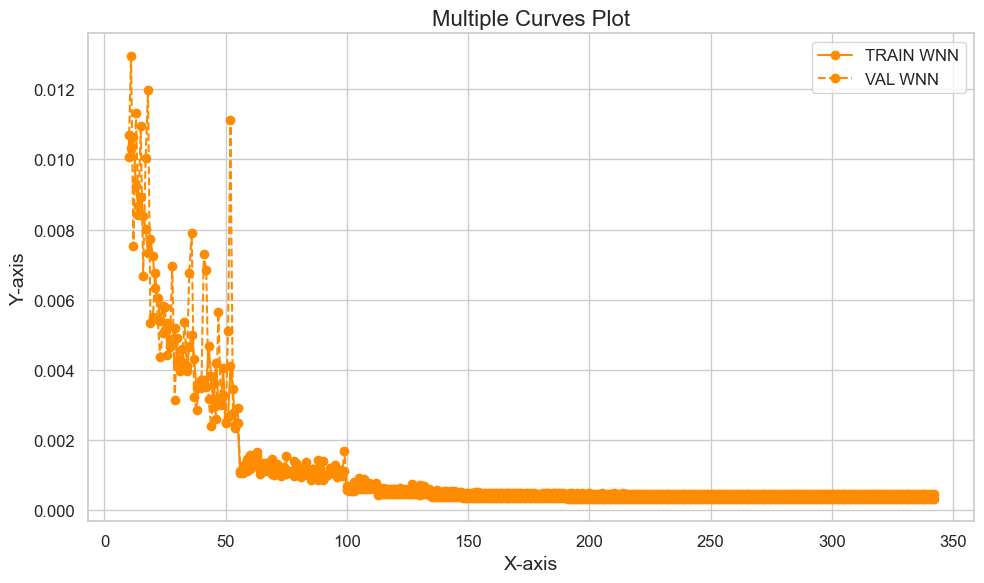

In [18]:
plot_curves(x_values=[np.arange(10,len(train_list_WNNBase)), np.arange(10,len(val_list_WNNBase))], 
            y_values=[train_list_WNNBase[10:], val_list_WNNBase[10:]],
            colors=['darkorange', 'darkorange'],
            styles=["solid", "dashed"],
            labels=["TRAIN WNN", "VAL WNN"])

## Interactions

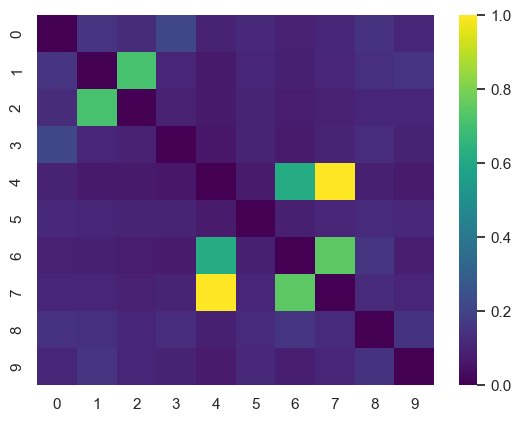

In [19]:
create_heatmap(neural_interaction_detection_basic(model_BasicNN))

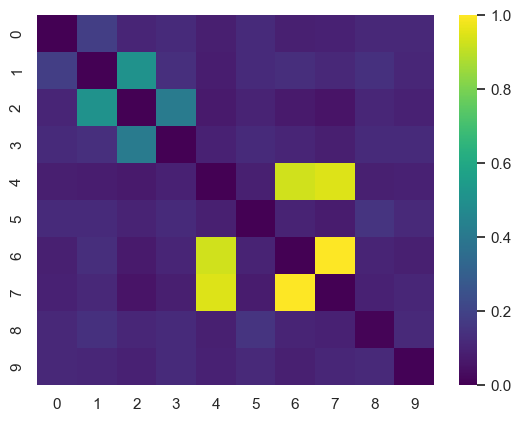

In [20]:
create_heatmap(analyze_WNNBase(model_WNNBase))

## SHAP analysis

In [42]:
def get_model_predict(model):
    def model_predict(data):
        with torch.no_grad():
            data_tensor = torch.tensor(data).float()
            preds = model(data_tensor)
            return preds.numpy().reshape(-1,)
    return model_predict

X_data = shap.kmeans(X_train, 500)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

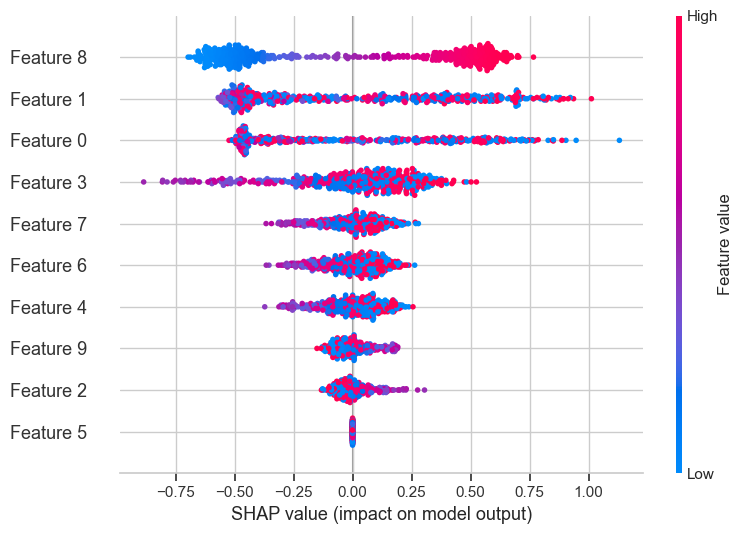

In [43]:
predict = get_model_predict(model_BasicNN)

#Create a SHAP explainer (DeepExplainer or GradientExplainer)
explainer = shap.KernelExplainer(predict, X_data.data)  # or shap.GradientExplainer

# Compute SHAP values
shap_values = explainer.shap_values(X_data.data)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_data.data)


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

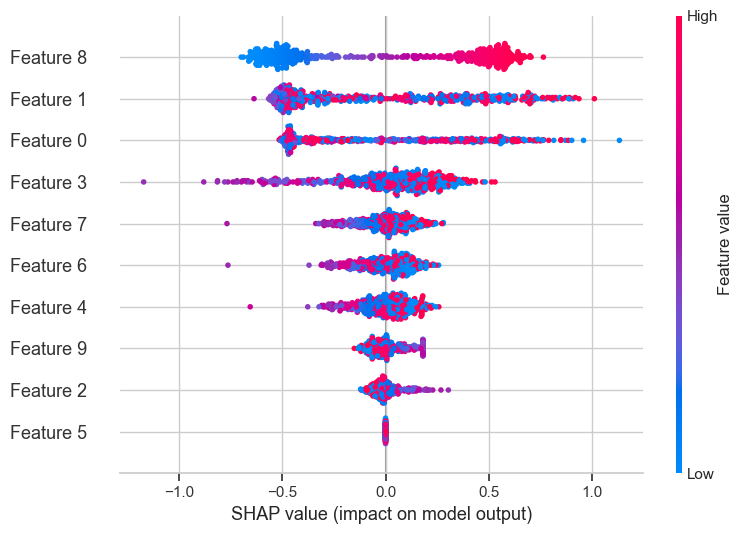

In [44]:
predict = get_model_predict(model_WNNBase)

#Create a SHAP explainer (DeepExplainer or GradientExplainer)
explainer = shap.KernelExplainer(predict, X_data.data)  # or shap.GradientExplainer

# Compute SHAP values
shap_values = explainer.shap_values(X_data.data)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_data.data)
